In [58]:
import pandas as pd
import numpy as np
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from bokeh.plotting import figure, output_notebook, show

In [59]:
#Enable Bokeh
output_notebook()

Loading BokehJS ...

In [61]:
n1 = pd.read_csv('s1.csv', header=None, index_col = 0)
n2 = pd.read_csv('s2.csv', header=None, index_col = 0)
n3 = pd.read_csv('s3.csv', header=None, index_col = 0)
n4 = pd.read_csv('s4.csv', header=None, index_col = 0)
n5 = pd.read_csv('s5.csv', header=None, index_col = 0)
n6 = pd.read_csv('s6.csv', header=None, index_col = 0)

In [78]:
n5.index[-1]

14831.421695232393

In [4]:
# Generate canvas
fig = figure(title='Analysis of EAR',
             x_axis_label='second',
             y_axis_label='EAR',
             width=800,
             height=400)

fig.line(n2.index, n2[1], 
         line_alpha=0.8,
         legend_label='EAR-N2', 
         line_width=2,
         color='red',
         alpha = 0.9)
show(fig)

In [49]:
type(n1) 
# 1. 43(0.251), 2. 31(0.228), 3. 45(0.228), 4. 19(0.215)

pandas.core.frame.DataFrame

In [62]:
def calculate(df, thread):
    df = df.loc[:300]
    total = 0
    flag = False
    lst = df[1].tolist()
    for i in range(0, len(lst)):
        if (lst[i] < thread):            
            flag = True
        else:
            if flag and lst[i - 2] < thread:
                total += 1
            flag = False
    print(total)

In [63]:
def eyeBlink(df, thread):
    time, value = [], []
    flag = False
    index = df.index
    lst = df[1].tolist()
    for i in range(0, len(lst)):
        if (lst[i] < thread):            
            flag = True
        else:
            if flag and lst[i - 2] < thread:
                time.append(index[i])
                value.append(lst[i - 1])
            flag = False
    result = pd.DataFrame(zip(time, value), columns=['Seconds','EAR'])
    return result

In [64]:
result1 = eyeBlink(n1, 0.23)
result2 = eyeBlink(n2, 0.23)
result3 = eyeBlink(n3, 0.23)
result4 = eyeBlink(n4, 0.23)
result5 = eyeBlink(n5, 0.23)
result6 = eyeBlink(n6, 0.23)

result = [result1, result2, result3, result4, result5, result6]

In [65]:
for i in range(0, len(result)):
    print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(i + 1, int(result[i]["Seconds"][len(result[i])- 1] / 60), len(result[i]), 60 *len(result[i])/result[i]["Seconds"][len(result[i]) - 1], result[i]["EAR"].sum()/len(result[i])))

1권, 길이 287 분,  총 2149 눈깜빡임,  1분당 깜빡임 7.472219318572043, 평균 EAR 값 0.21629252027831444
2권, 길이 279 분,  총 1023 눈깜빡임,  1분당 깜빡임 3.6661044960001337, 평균 EAR 값 0.206817423720931
3권, 길이 281 분,  총 1236 눈깜빡임,  1분당 깜빡임 4.390111907079404, 평균 EAR 값 0.20960550220189905
4권, 길이 309 분,  총 1494 눈깜빡임,  1분당 깜빡임 4.8313366326474965, 평균 EAR 값 0.2103486628877688
5권, 길이 257 분,  총 1208 눈깜빡임,  1분당 깜빡임 4.696957854721356, 평균 EAR 값 0.21051849882711596
6권, 길이 261 분,  총 1188 눈깜빡임,  1분당 깜빡임 4.545970933224589, 평균 EAR 값 0.21119700206907796


In [66]:
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(1, int(48), len(result[0]), len(result[0])/48, result[0]["EAR"].sum()/len(result[0])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(2, int(48), len(result[1]), len(result[1])/48, result[1]["EAR"].sum()/len(result[1])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(3, int(49), len(result[2]), len(result[2])/49, result[2]["EAR"].sum()/len(result[2])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(4, int(61), len(result[3]), len(result[3])/61, result[3]["EAR"].sum()/len(result[3])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(5, int(42), len(result[4]), len(result[4])/42, result[4]["EAR"].sum()/len(result[4])))
print("{}권, 길이 {} 분,  총 {} 눈깜빡임,  1분당 깜빡임 {}, 평균 EAR 값 {}".format(6, int(43), len(result[5]), len(result[5])/43, result[5]["EAR"].sum()/len(result[5])))

1권, 길이 48 분,  총 2149 눈깜빡임,  1분당 깜빡임 44.770833333333336, 평균 EAR 값 0.21629252027831444
2권, 길이 48 분,  총 1023 눈깜빡임,  1분당 깜빡임 21.3125, 평균 EAR 값 0.206817423720931
3권, 길이 49 분,  총 1236 눈깜빡임,  1분당 깜빡임 25.224489795918366, 평균 EAR 값 0.20960550220189905
4권, 길이 61 분,  총 1494 눈깜빡임,  1분당 깜빡임 24.491803278688526, 평균 EAR 값 0.2103486628877688
5권, 길이 42 분,  총 1208 눈깜빡임,  1분당 깜빡임 28.761904761904763, 평균 EAR 값 0.21051849882711596
6권, 길이 43 분,  총 1188 눈깜빡임,  1분당 깜빡임 27.627906976744185, 평균 EAR 값 0.21119700206907796


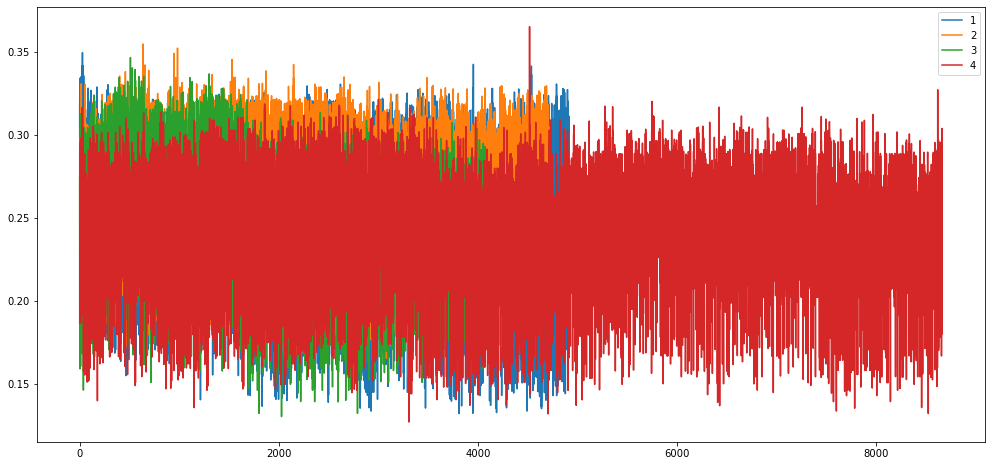

In [32]:
plt.figure(figsize=(17,8))
plt.plot(n1.index, n1[1], label="1")
plt.plot(n2.index, n2[1], label="2")
plt.plot(n3.index, n3[1], label="3")
plt.plot(n4.index, n4[1], label="4")
plt.legend()

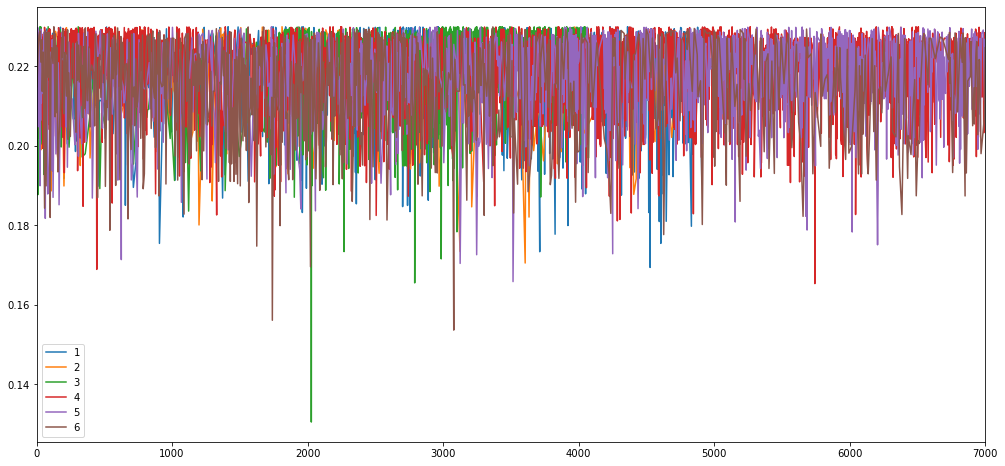

In [55]:
plt.figure(figsize=(17,8))
plt.plot(result1["Seconds"], result1["EAR"], label="1")
plt.plot(result2["Seconds"], result2["EAR"], label="2")
plt.plot(result3["Seconds"], result3["EAR"], label="3")
plt.plot(result4["Seconds"], result4["EAR"], label="4")
plt.plot(result5["Seconds"], result5["EAR"], label="5")
plt.plot(result6["Seconds"], result6["EAR"], label="6")

plt.xlim([0,7000])
plt.legend()

In [40]:
fig = figure(title='Analysis of EAR',
             x_axis_label='second',
             y_axis_label='EAR',
             width=800,
             height=400)
fig.scatter(result1["Seconds"], result1["EAR"],
            line_alpha=0.5,
            line_width=.5)
fig.scatter(result2["Seconds"], result2["EAR"],
            line_alpha=0.5,
            line_width=.5, color = 'red')

show(fig)

In [68]:
14000/60

233.33333333333334

In [84]:
14000/60

233.33333333333334